# WeatherPy
---

### Analysis



1. On the first graph (City Latitude vs Max Temperature), the latitude at 0 is equivalent to the equator. We can see that at 0, the max temperatures are at the highest. Anything going further from 0, the temperatures begin decreasing.

2. The max temperatures seem to be colder in the Northern Hemisphere based on the first graph (City Latitude vs Max Temperature).

3. On the other graphs, it doesn't seem like there is any correlation between latitude and the other chosen variables. Cloudiness, humidity, and wind speed varies across all latitudes.


In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [9]:
# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='' + api_key

In [10]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [11]:
# Start the call counter 
record = 1

# Log file print statement
print(f'Beginning Data Retrieval')
print(f'-------------------------------')

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f'{url}&q={city}').json() 
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind_speed.append(response['wind']['speed'])
        city_record = response['name']
        print(f'Processing Record {record} | {city_record}')
        print(f'{url}&q={city}')
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep([0.5, 1, 1.5, 1, 0.5])
        
    # If no record found "skip" to next call
    except:
        print('City not found. Skipping...')
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=saint george
City not found. Skipping...
Processing Record 2 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=rikitea
City not found. Skipping...
Processing Record 3 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=vaini
City not found. Skipping...
Processing Record 4 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=cape town
City not found. Skipping...
Processing Record 5 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=provideniya
City not found. Skipping...
Processing Record 6 | Mineiros
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 47 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=severo-kurilsk
City not found. Skipping...
Processing Record 48 | Bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=bambanglipuro
City not found. Skipping...
Processing Record 49 | Tarko-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=tarko-sale
City not found. Skipping...
Processing Record 50 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=puerto ayora
City not found. Skipping...
Processing Record 51 | Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=margate
City not found. Skipping...
Processing Record 52 | Zhob
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad

Processing Record 94 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=yar-sale
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 95 | Nelson Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=nelson bay
City not found. Skipping...
City not found. Skipping...
Processing Record 96 | Nizhniy Kuranakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=nizhniy kuranakh
City not found. Skipping...
Processing Record 97 | Kalmunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=kalmunai
City not found. Skipping...
Processing Record 98 | Takoradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=takoradi
City not found. Skipping...
Processing Record 99 | Algiers
http:

Processing Record 141 | Barabai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=barabai
City not found. Skipping...
Processing Record 142 | Eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=eureka
City not found. Skipping...
Processing Record 143 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=saldanha
City not found. Skipping...
Processing Record 144 | Gorahun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=gorahun
City not found. Skipping...
Processing Record 145 | Pedernales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=pedernales
City not found. Skipping...
Processing Record 146 | Boundiali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=bo

Processing Record 188 | Garoua Boulai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=garoua boulai
City not found. Skipping...
Processing Record 189 | Willowmore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=willowmore
City not found. Skipping...
Processing Record 190 | Ca Mau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=ca mau
City not found. Skipping...
Processing Record 191 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=beringovskiy
City not found. Skipping...
Processing Record 192 | Charyshskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=charyshskoye
City not found. Skipping...
City not found. Skipping...
Processing Record 193 | Omboue
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 236 | Kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=kieta
City not found. Skipping...
City not found. Skipping...
Processing Record 237 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=castro
City not found. Skipping...
Processing Record 238 | Luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=luanda
City not found. Skipping...
Processing Record 239 | Alfenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=alfenas
City not found. Skipping...
Processing Record 240 | Chandla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=chandla
City not found. Skipping...
Processing Record 241 | Silifke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373d

Processing Record 284 | Ust-Omchug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=ust-omchug
City not found. Skipping...
Processing Record 285 | Jaguarari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=jaguarari
City not found. Skipping...
Processing Record 286 | Canutama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=canutama
City not found. Skipping...
Processing Record 287 | Savelugu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=savelugu
City not found. Skipping...
Processing Record 288 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=codrington
City not found. Skipping...
Processing Record 289 | Krasnovishersk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad441342

Processing Record 331 | Bayanday
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=bayanday
City not found. Skipping...
Processing Record 332 | Eldama Ravine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=eldama ravine
City not found. Skipping...
Processing Record 333 | Boca do Acre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=boca do acre
City not found. Skipping...
Processing Record 334 | Caborca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=caborca
City not found. Skipping...
Processing Record 335 | Teahupoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=teahupoo
City not found. Skipping...
Processing Record 336 | Aquiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422

Processing Record 378 | Winnemucca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=winnemucca
City not found. Skipping...
Processing Record 379 | Nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=nuuk
City not found. Skipping...
Processing Record 380 | Koutsouras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=koutsouras
City not found. Skipping...
Processing Record 381 | Kriel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=kriel
City not found. Skipping...
Processing Record 382 | Gondanglegi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=gondanglegi
City not found. Skipping...
Processing Record 383 | Florence
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q

Processing Record 426 | Jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=jalu
City not found. Skipping...
Processing Record 427 | Salimpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=salimpur
City not found. Skipping...
Processing Record 428 | Huancavelica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=huancavelica
City not found. Skipping...
Processing Record 429 | Teguldet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=teguldet
City not found. Skipping...
Processing Record 430 | Enumclaw
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=enumclaw
City not found. Skipping...
Processing Record 431 | Upata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=up

Processing Record 473 | Jales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=jales
City not found. Skipping...
Processing Record 474 | Paengaroa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=paengaroa
City not found. Skipping...
Processing Record 475 | Clearwater
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=clearwater
City not found. Skipping...
Processing Record 476 | Strezhevoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=strezhevoy
City not found. Skipping...
Processing Record 477 | Ust-Koksa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=ust-koksa
City not found. Skipping...
Processing Record 478 | Borovskoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df7

Processing Record 521 | Severobaykalsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=severobaykalsk
City not found. Skipping...
Processing Record 522 | Tucupita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=tucupita
City not found. Skipping...
Processing Record 523 | Knokke-Heist
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=knokke-heist
City not found. Skipping...
Processing Record 524 | Tabuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=tabuk
City not found. Skipping...
Processing Record 525 | Sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=sur
City not found. Skipping...
Processing Record 526 | Birao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    'City': city_name,
    'Cloudiness':cloudiness, 
    'Country':country,
    'Date':date, 
    'Humidity': humidity,
    'Lat':lat, 
    'Lng':lng, 
    'Max Temp': max_temp,
    'Wind Speed':wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [13]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint George,75,GR,1556927400,76,39.45,22.34,53.60,4.14
1,Rikitea,27,PF,1556931367,73,-23.12,-134.97,77.04,20.04
2,Vaini,100,IN,1556928000,94,15.34,74.49,68.00,5.82
3,Cape Town,0,ZA,1556931066,87,-33.93,18.42,57.99,4.70
4,Provideniya,100,RU,1556931367,97,64.42,-173.23,31.00,2.28


In [15]:
# Save dataframe to csv file
weather_data.to_csv('output_data/cities.csv')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

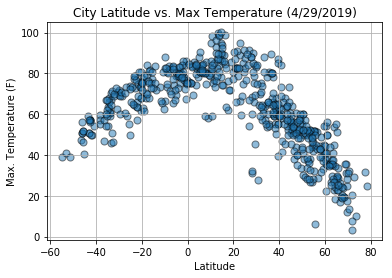

In [8]:

# Build a scatter plot for each data type
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker='o', s=50, alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (4/29/2019)')
plt.ylabel('Max. Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('Images/Max_Temp_vs_Latitude.png')

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

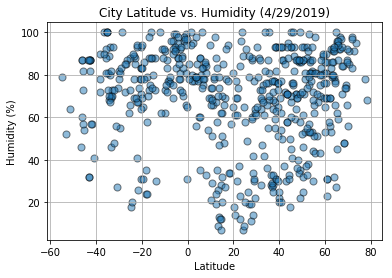

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker='o', s=50, alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (4/29/2019)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('Images/Humidity_vs_Latitude.png')

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

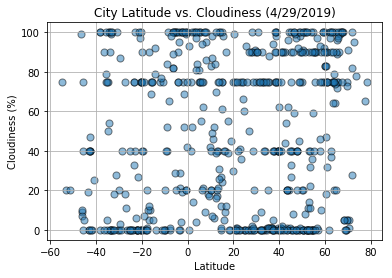

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker='o', s=50, alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (4/29/2019)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('Images/Cloudiness_vs_Latitude.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot


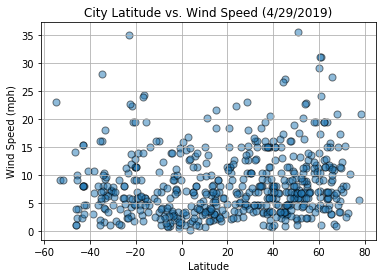

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker='o', s=50, alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (4/29/2019)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('Images/Wind_Speed_vs_Latitude.png')

# Show plot
plt.show()